<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [1]:
from google.colab import drive

#accessing My Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


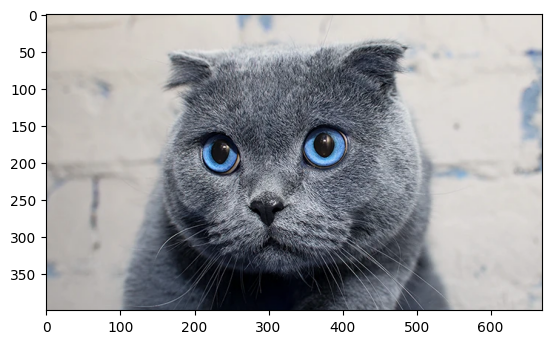

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')
plt.imshow(img) #perhatikan hasilnya adalah citra dgn channel warna BGR

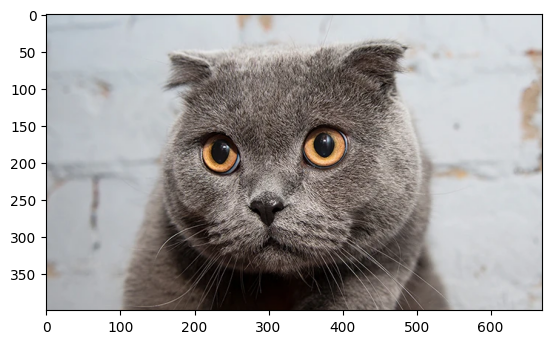

In [3]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB) #konversi channel BGR -> RGB
plt.imshow(img3)

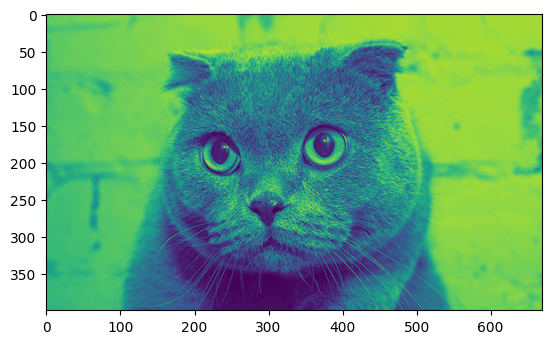

In [4]:
img_gray = cv.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

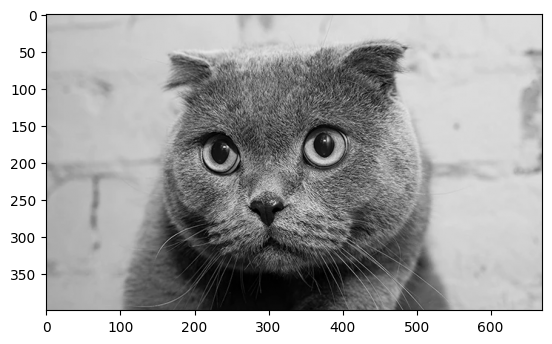

In [5]:
plt.imshow(img_gray, cmap='gray')

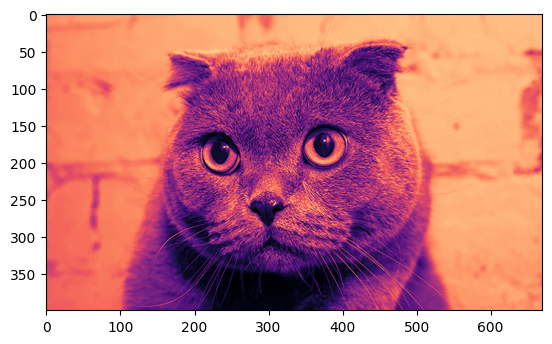

In [6]:
plt.imshow(img_gray, cmap='magma')

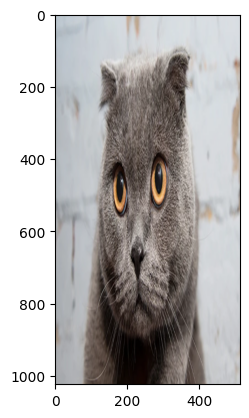

In [7]:
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

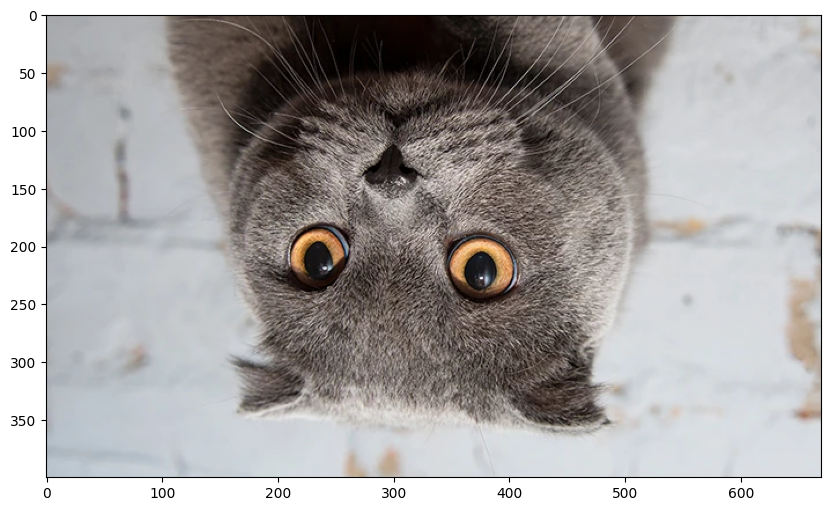

In [8]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)
#simpan File image
#cv.imwrite('grive/MyDrive/PCVK_MM/Images/mandrill2.tiff', img5)

#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(10,10)) #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

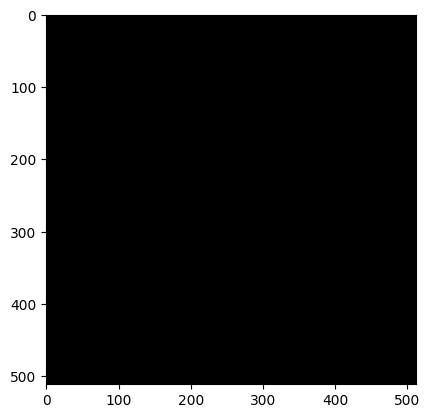

In [9]:
black_img = np.zeros(shape=(512,512,3), dtype=np.int16)
plt.imshow(black_img)

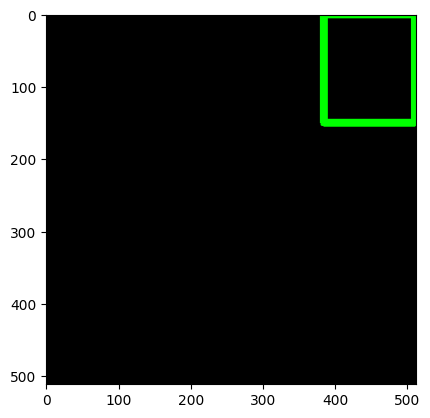

In [10]:
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)
plt.imshow(black_img)

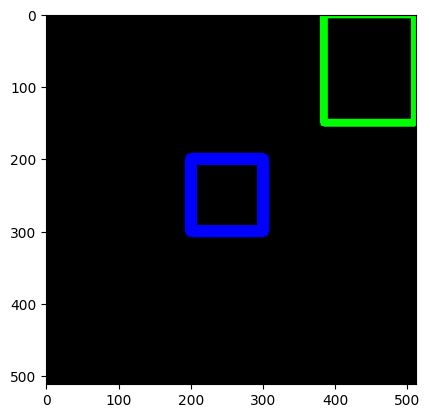

In [11]:
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)
plt.imshow(black_img)

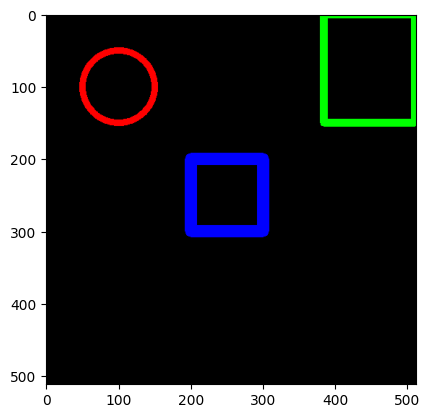

In [12]:
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_img)

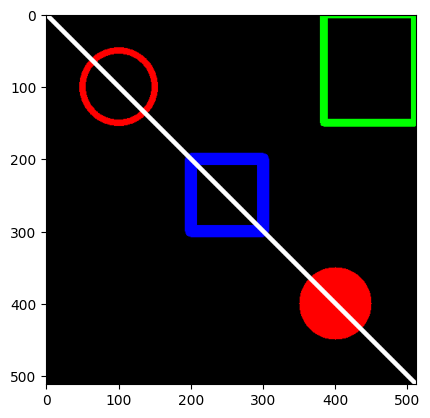

In [18]:
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
plt.imshow(black_img)

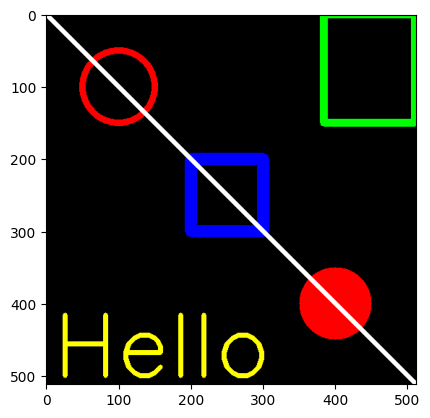

In [19]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=5, lineType=cv.LINE_AA)
plt.imshow(black_img)


In [20]:
vertices = np.array([[[100,300],[200,200],[400,300],[200,400]]],dtype=np.int32)
vertices

array([[[100, 300],
        [200, 200],
        [400, 300],
        [200, 400]]], dtype=int32)

In [21]:
pts = vertices.reshape((-1,1,2)) # nilai 2 untuk menunjukkan bahwa tiap titik dibuat 3 channel yg mewakili R, G, dan B
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

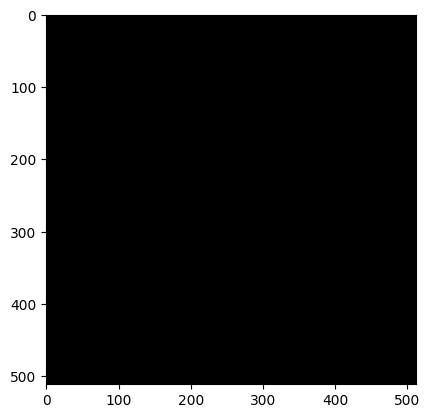

In [23]:
black_img2=np.zeros(shape=(512,512,3), dtype=np.int32)
plt.imshow(black_img2)

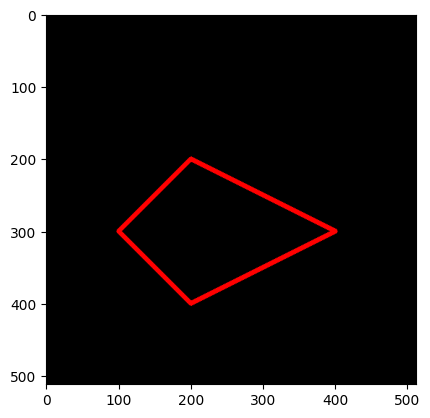

In [24]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype=np.int32)
pts = vertices.reshape((-1,1,2))
# vertices

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)

# **Pertanyaan**


1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?
*   Tanpa Matplotlib (menggunakan cv2.imshow()): Gambar ditampilkan dalam jendela terpisah oleh OpenCV. Jendela ini menampilkan gambar secara langsung sesuai format aslinya (BGR).
*   Dengan Matplotlib (plt.imshow()): Gambar ditampilkan di dalam sel notebook sebagai bagian dari output. Matplotlib mengonversi warna dari format BGR (OpenCV) ke RGB sebelum menampilkan


2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?
*   Perbedaan: Perbedaan utama terletak pada ukuran memori dan rentang nilai yang dapat disimpan.
*   int16: Menggunakan 2 byte (16 bit) per elemen. Rentang nilai: -32.768 hingga 32.767.
*   int32: Menggunakan 4 byte (32 bit) per elemen. Rentang nilai: -2.147.483.648 hingga 2.147.483.647.

*   Pengaruhnya Untuk gambar hitam standar (nilai pixel = 0), keduanya berfungsi identik karena 0 berada dalam rentang kedua tipe data. Namun, jika ingin membuat gambar dengan nilai pixel yang sangat besar (misalnya, > 32.767) atau melakukan operasi matematika yang bisa menghasilkan nilai besar, int32 lebih aman karena tidak akan mengalami overflow (melampaui batas maksimum) seperti int16.

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut
*   Fungsi cv2_imshow() dari google.colab.patches adalah fitur Google Colab. Karena cv2.imshow() tidak bisa menampilkan jendela GUI di browser, cv2_imshow() berfungsi sebagai wrapper atau patch yang mampu menampilkan gambar yang dibaca oleh OpenCV (dalam format BGR) langsung di dalam sel notebook Colab

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3
*   Fungsinya adalah untuk membaca file gambar dari disk ke dalam bentuk array NumPy, dan/atau menyimpan array NumPy sebagai file gambar ke disk.

# **Tugas**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

*   Tidak. Parameter figsize pada matplotlib.pyplot.figure() atau plt.subplots() hanya mengatur ukuran tampilan visual (dalam inci) dari plot di notebook. Ukuran piksel asli dari gambar (jumlah baris x jumlah kolom) tidak berubah. Hanya resolusi layar (dpi) dan ukuran jendela tampilan yang dipengaruhi.

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

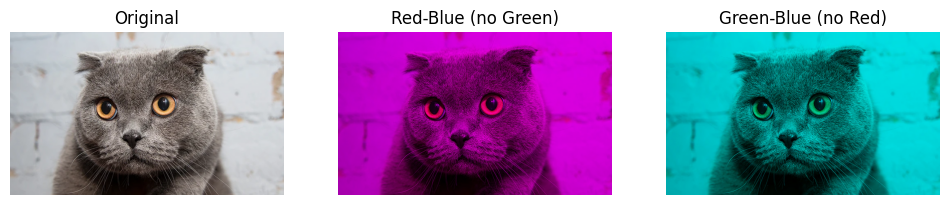

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar (OpenCV baca BGR)
img = cv2.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')

# Channel Red-Blue (tanpa Green)
# Buat salinan gambar, atur channel Green menjadi 0
img_RB = img.copy()
img_RB[:, :, 1] = 0 # Set channel Green (index 1) ke 0

# Channel Green-Blue (tanpa Red)
# Buat salinan gambar, atur channel Red menjadi 0
img_GB = img.copy()
img_GB[:, :, 2] = 0 # Set channel Red (index 2) ke 0

# Tampilkan
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Red-Blue (no Green)')
plt.imshow(cv2.cvtColor(img_RB, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Green-Blue (no Red)')
plt.imshow(cv2.cvtColor(img_GB, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120!

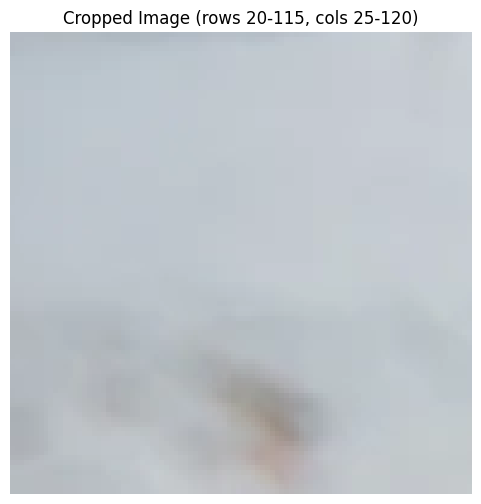

In [27]:
# Slicing: [baris_awal:baris_akhir, kolom_awal:kolom_akhir]
cropped_img = img[20:116, 25:121] # 116 karena slicing eksklusif di akhir

plt.figure(figsize=(6, 6))
plt.title('Cropped Image (rows 20-115, cols 25-120)')
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

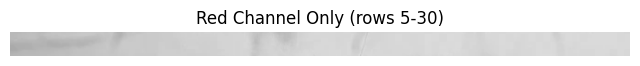

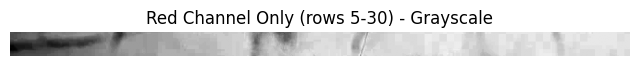

In [28]:
# Ambil hanya channel Red (index 2) dari rentang baris tertentu
red_channel_only = img[5:31, :, 2] # Baris 5 sampai 30 (eksklusif 31), semua kolom, channel Red

# Karena ini grayscale (1 channel), kita perlu mengonversi ke 3 channel agar bisa ditampilkan dengan plt.imshow
red_3channel = cv2.cvtColor(red_channel_only, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(8, 4))
plt.title('Red Channel Only (rows 5-30)')
plt.imshow(red_3channel, cmap='gray') # Atau tanpa cmap='gray', tapi akan terlihat aneh karena hanya satu channel
plt.axis('off')
plt.show()

# Alternatif: Tampilkan sebagai grayscale
plt.figure(figsize=(8, 4))
plt.title('Red Channel Only (rows 5-30) - Grayscale')
plt.imshow(red_channel_only, cmap='gray')
plt.axis('off')
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

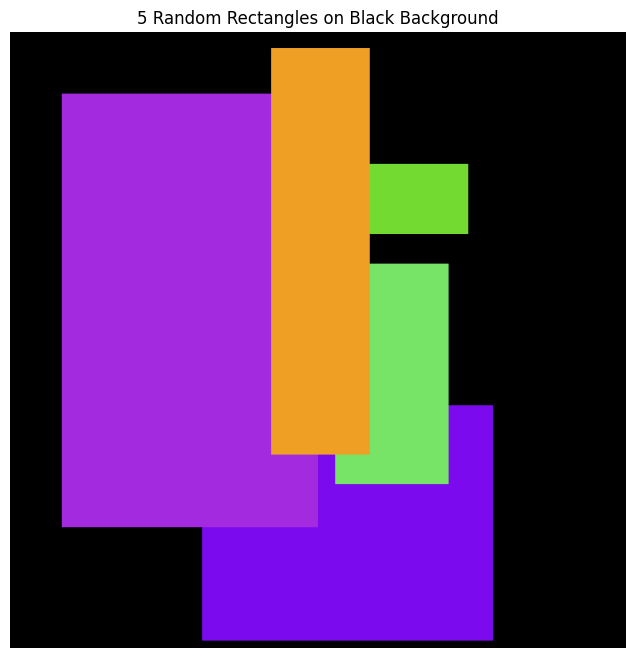

In [29]:
import cv2
import numpy as np
import random

# Buat background hitam
height, width = 500, 500
black_image = np.zeros((height, width, 3), dtype=np.uint8) # uint8 untuk 0-255

# Generate 5 kotak acak
for _ in range(5):
    # Random warna (B, G, R)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    # Random koordinat titik atas kiri dan bawah kanan
    pt1_x = random.randint(0, width-50)
    pt1_y = random.randint(0, height-50)
    pt2_x = random.randint(pt1_x+20, width)
    pt2_y = random.randint(pt1_y+20, height)
    pt1 = (pt1_x, pt1_y)
    pt2 = (pt2_x, pt2_y)

    # Gambar persegi panjang
    cv2.rectangle(black_image, pt1, pt2, color, thickness=-1) # -1 untuk diisi

# Tampilkan
plt.figure(figsize=(8, 8))
plt.title('5 Random Rectangles on Black Background')
plt.imshow(cv2.cvtColor(black_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

6. Tampilkan image dengan posisi terbalik!
Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut :

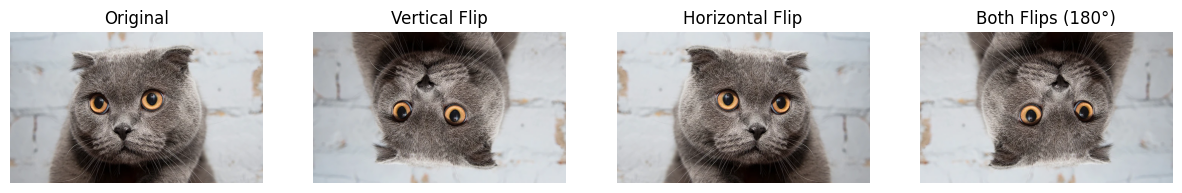

In [30]:
# Flip vertikal (atas-bawah)
flipped_vertical = cv2.flip(img, 0)

# Flip horizontal (kiri-kanan)
flipped_horizontal = cv2.flip(img, 1)

# Flip vertikal dan horizontal (180 derajat)
flipped_both = cv2.flip(img, -1)

# Tampilkan
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Vertical Flip')
plt.imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Horizontal Flip')
plt.imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Both Flips (180°)')
plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).

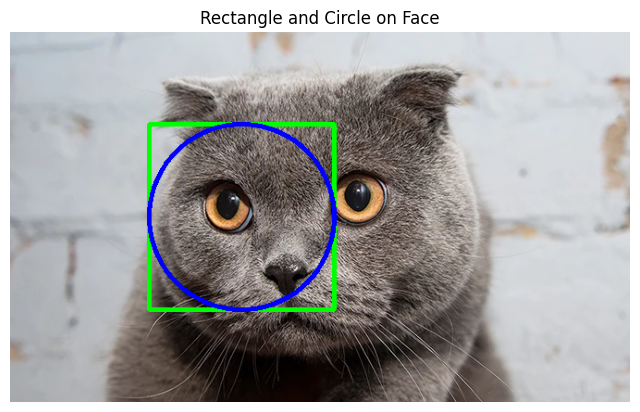

In [34]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')

# Contoh koordinat (Anda harus menyesuaikan!)
# Asumsikan wajah berada di koordinat tertentu
face_pt1 = (150, 100)  # kiri atas
face_pt2 = (350, 300)  # kanan bawah
face_center = (250, 200) # pusat wajah
face_radius = 100

# Gambar rectangle dan circle
cv2.rectangle(img, face_pt1, face_pt2, (0, 255, 0), 3) # Hijau
cv2.circle(img, face_center, face_radius, (255, 0, 0), 3) # Biru

# Tampilkan
plt.figure(figsize=(8, 8))
plt.title('Rectangle and Circle on Face')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

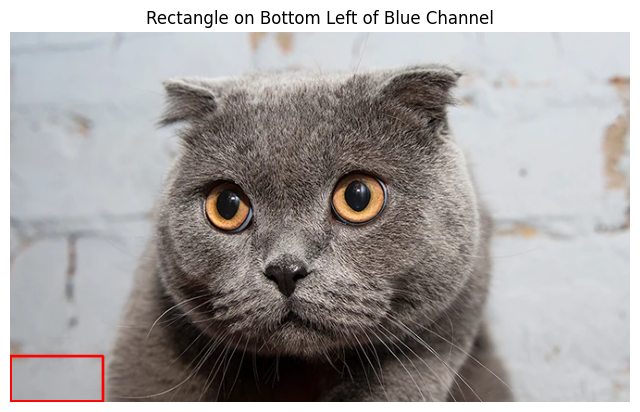

In [36]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')

# Ambil channel Blue (indeks 0)
blue_channel = img[:, :, 0]

# Dapatkan dimensi
height, width = blue_channel.shape

# Tentukan sudut bawah kiri: (0, height-1) -> (0, height-1) adalah pojok kiri bawah
# Kita buat rectangle di sekitar area kecil di pojok kiri bawah
rect_pt1 = (0, height - 50) # kiri atas dari rectangle
rect_pt2 = (100, height - 1) # kanan bawah dari rectangle

# Salin gambar asli untuk dimodifikasi
img_with_rect = img.copy()

# Gambar rectangle di channel B (tapi kita gambar di gambar RGB asli, warna merah)
cv2.rectangle(img_with_rect, rect_pt1, rect_pt2, (0, 0, 255), 2) # Merah

# Tampilkan
plt.figure(figsize=(8, 8))
plt.title('Rectangle on Bottom Left of Blue Channel')
plt.imshow(cv2.cvtColor(img_with_rect, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran
font, dan warna font yang sesuai keinginan anda.

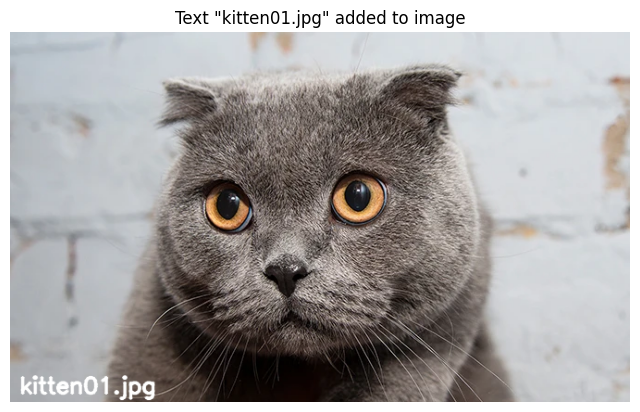

In [37]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')
filename = "kitten01.jpg" # Nama file Anda

# Dapatkan dimensi
height, width = img.shape[:2]

# Tentukan posisi teks (misalnya, di dekat pojok kiri bawah)
text_position = (10, height - 10) # 10 piksel dari kiri, 10 piksel dari bawah

# Gunakan font, ukuran, warna
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
color = (255, 255, 255) # Putih
thickness = 2

# Tambahkan teks
cv2.putText(img, filename, text_position, font, font_scale, color, thickness, cv2.LINE_AA)

# Tampilkan
plt.figure(figsize=(8, 8))
plt.title(f'Text "{filename}" added to image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()